In [1]:
# Import all necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
from pylab import *
import numpy as np
import random

%matplotlib inline

In [2]:
# Number of pairs feature/label.
M = 1000

## No-scaling applied to the features.

In [3]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(1234)

#Creating training set.
# Input values (features)
x1_t = np.random.randn(M, 1)

x2_t = 10*np.random.randn(M, 1) + 10

# Output values (targets).
y_t = x1_t + x2_t # N AWGN to compare both diferents error surface scales

# Concatenate both column vectors.
#FELIPE: Você encontra os valores ótimos e treina o algortimo sempre com o conjunto de treinamento o de validação é apenas para verificação do modelo.
X_t = np.c_[x1_t, x2_t]

In [4]:
#Changing the seed to keep the different sets
np.random.seed(2345)

#Creating validation set.
# Input values (features)
x1_v = np.random.randn(M, 1)

x2_v = 10*np.random.randn(M, 1) + 10

# Output values (targets).
y_v = x1_v + x2_v

#Concatenate both columm to validate
X_v = np.c_[x1_v, x2_v]

In [5]:
# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X_t).dot(X_t)).dot(np.transpose(X_t).dot(y_t))
yhat = a_opt[0, 0]*x1_t + a_opt[1, 0]*x2_t
Joptimum = (1/M)*np.sum(np.power((y_t - yhat), 2))

In [6]:
# Generate values for parameters.
N = 200
a1 = np.linspace(-22.0, 24.0, N)
a2 = np.linspace(-22.0, 24.0, N)

A1, A2 = np.meshgrid(a1, a2)

# Generate points for plotting the cost-function surface.
J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1_t + A2[iter1][iter2]*x2_t
        J[iter1][iter2] = (1/M)*np.sum( np.square(y_t - yhat)  )

In [7]:
# Batch gradient descendent solution.

# learning rate.
alpha = 0.002
# Maximum number of iterations.
n_iterations = 2000

# Random initialization of parameters.
a = np.zeros((2,1))
a[0] = -20;
a[1] = -20;

# Create vector for parameter history.
a_hist = np.zeros((2, n_iterations+1))
# Initialize history vector.
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

# Create array for storing training error values.
Jgd_t = np.zeros(n_iterations+1)

# Create array for storing validation error values.
Jgd_v = np.zeros(n_iterations+1)

#Training set error
Jgd_t[0] = (1/M)*sum(np.power(y_t - X_t.dot(a), 2))

#Validation set error
Jgd_v[0] = (1/M)*sum(np.power(y_v - X_v.dot(a), 2))

# Batch gradient-descent loop.
iteration = 0
error = 1
grad_hist = np.zeros((2, n_iterations))

#2000 iterations and a stop criterion that makes the algorithm stop when the error 
#between two consecutive times is less than 0.001, therefore, the algorithm will stop 
#if the error is less than 0.001 or if the maximum number of iterations is met 

while iteration < n_iterations and error > 0.001:
    gradients = -2/M * X_t.T.dot(y_t - X_t.dot(a))
    grad_hist[0, iteration] = gradients[0]
    grad_hist[1, iteration] = gradients[1]
    a = a - alpha * gradients
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]
    #Training set error to i^n epoch
    Jgd_t[iteration+1] = (1/M)*sum(np.power( (y_t - X_t.dot(a)) , 2))
    #Validation set error to i^n epoch
    Jgd_v[iteration+1] = (1/M)*sum(np.power( (y_v - X_v.dot(a)) , 2))
    error = np.abs(Jgd_t[iteration+1] - Jgd_t[iteration])
    iteration = iteration + 1

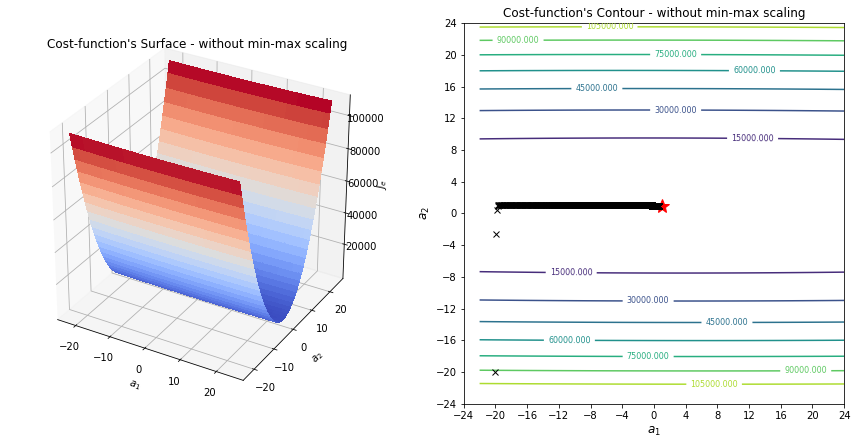

In [8]:
#Ploting error surface without scaling adjust

# Plot cost-function surface.
fig = plt.figure(figsize=(15, 7))

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_1$')
ax.set_ylabel('$a_2$')
ax.set_zlabel('$J_e$')
plt.title('Cost-function\'s Surface - without min-max scaling')

ax = plt.subplot(1, 2, 2)
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=8)
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=14)

#Plot weight history.
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xlabel('$a_1$', fontsize=12)
plt.ylabel('$a_2$', fontsize=12)
plt.title('Cost-function\'s Contour - without min-max scaling')
ax.set_xticks(np.arange(-24, 25, step=4.0))
ax.set_yticks(np.arange(-24, 25, step=4.0))

#Show the plot.
plt.show()

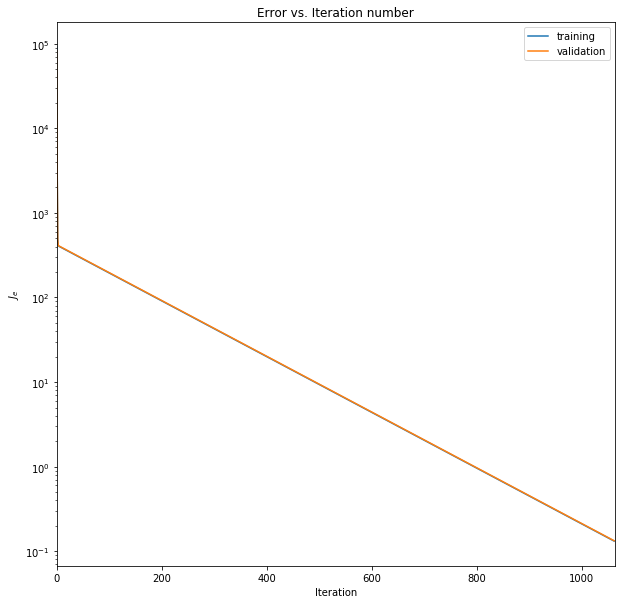

In [9]:
#Plot the number of epochs without scaling adjust.
fig = plt.figure(figsize=(10,10))
plt.plot(np.arange(0, iteration), Jgd_t[0:iteration], label='training')
plt.plot(np.arange(0, iteration), Jgd_v[0:iteration], label='validation')
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.legend()
plt.show()
#plt.savefig("Error_vs_iteration_bgd_Execise_8B.png", dpi=600)

In [10]:
# Print found values.
print('a1_opt: ' + str(a_opt[0, 0]))
print('a2_opt: ' + str(a_opt[1, 0]))

print('a1_gd: ' + str(a[0, 0]))
print('a2_gd: ' + str(a[1, 0]))

a1_opt: 1.0000000000000124
a2_opt: 0.9999999999999998
a1_gd: 0.6284506144295874
a2_gd: 1.000471927377925


## Apply Padronization scaling to the features.

In [15]:
#Scaling adjust

# Import Class StandardScaler from module Preprocessing of library sklearn responsible for normalizing the data.
from sklearn.preprocessing import StandardScaler

# Instantiate a Standard scaler.
stdScaler = StandardScaler()

# Concatenate both column vectors.
X_t = np.c_[x1_t, x2_t]

# Scaling the features.
scaled_X_t = stdScaler.fit_transform(X_t)

# Concatenate both column vectors.
X_v = np.c_[x1_v, x2_v]

# Normalized validation set with min-max values to training set - use 'transform' method
scaled_X_v = stdScaler.transform(X_v)

In [16]:
# Calculating the new best point with scaling adjusted

# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(scaled_X_t).dot(scaled_X_t)).dot(np.transpose(scaled_X_t).dot(y_t))
yhat = a_opt[0, 0]*scaled_X_t[:,0] + a_opt[1, 0]*scaled_X_t[:,1]
Joptimum = (1/M)*np.sum(np.power((y_t - yhat), 2))

In [17]:
# Generate values for parameters.
N = 25
a1 = np.linspace(-22.0, 44.0, N)
a2 = np.linspace(-22.0, 44.0, N)

A1, A2 = np.meshgrid(a1, a2)

x1_t_scaled = scaled_X_t[0:M,0]
x2_t_scaled = scaled_X_t[0:M,1]

J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1_t_scaled + A2[iter1][iter2]*x2_t_scaled
        J[iter1][iter2] = (1/M)*np.sum(np.square(y_t - yhat))

In [40]:
#Algorithm work again with scaling features adjusted 

# Batch gradient descendent solution.

# learning rate.
alpha = 0.1
# Maximum number of iterations.
n_iterations = 2000

# Random initialization of parameters.
a = np.zeros((2,1))
a[0] = -20;
a[1] = -20;

# Create vector for parameter history.
a_hist = np.zeros((2, n_iterations+1))
# Initialize history vector.
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

# Create array for storing training error values.
Jgd_t = np.zeros(n_iterations+1)

# Create array for storing validation error values.
Jgd_v = np.zeros(n_iterations+1)

#Error with training set.
Jgd_t[0] = (1/M)*sum(np.power(y_t - scaled_X_t.dot(a), 2))

#Error with validation set.
Jgd_v[0] = (1/M)*sum(np.power(y_v - scaled_X_v.dot(a), 2))

# Batch gradient-descent loop.
iteration = 0
error = 1
grad_hist = np.zeros((2, n_iterations))

#2000 iterations and a stop criterion that makes the algorithm stop when the error 
#between two consecutive times is less than 0.001, therefore, the algorithm will stop 
#if the error is less than 0.001 or if the maximum number of iterations is met

while iteration < n_iterations and error > 0.001:
    gradients = -2/M * scaled_X_t.T.dot(y_t - scaled_X_t.dot(a))
    grad_hist[0, iteration] = gradients[0]
    grad_hist[1, iteration] = gradients[1]
    a = a - alpha * gradients
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]
    #Training set error to i^n epoch
    Jgd_t[iteration+1] = (1/M)*sum(np.power( (y_t - scaled_X_t.dot(a)) , 2))
    #Validation set error to i^n epoch
    Jgd_v[iteration+1] = (1/M)*sum(np.power( (y_v - scaled_X_v.dot(a)) , 2))
    error = np.abs(Jgd_t[iteration+1] - Jgd_t[iteration])
    iteration = iteration + 1

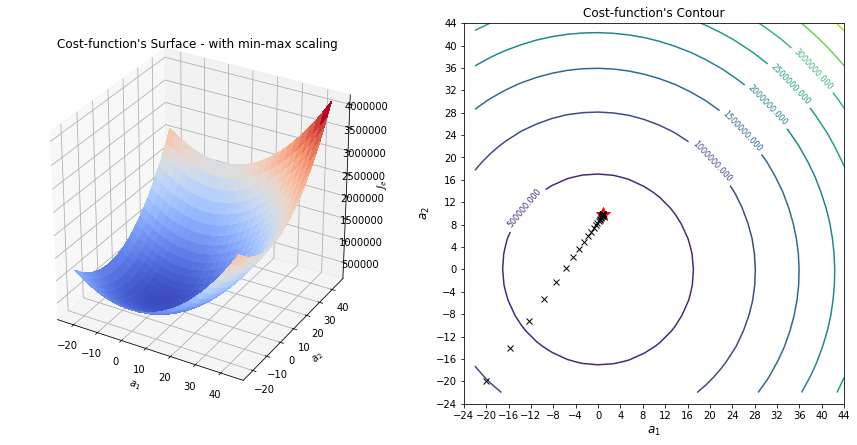

In [41]:
# Plot cost-function surface with scaling adjust
fig = plt.figure(figsize=(15, 7))

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_1$')
ax.set_ylabel('$a_2$')
ax.set_zlabel('$J_e$')
plt.title('Cost-function\'s Surface - with min-max scaling')

ax = plt.subplot(1, 2, 2)
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=8)
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=14)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xlabel('$a_1$', fontsize=12)
plt.ylabel('$a_2$', fontsize=12)
plt.title('Cost-function\'s Contour')
ax.set_xticks(np.arange(-24, 48, step=4.0))
ax.set_yticks(np.arange(-24, 48, step=4.0))

#Show the plot.
plt.show()

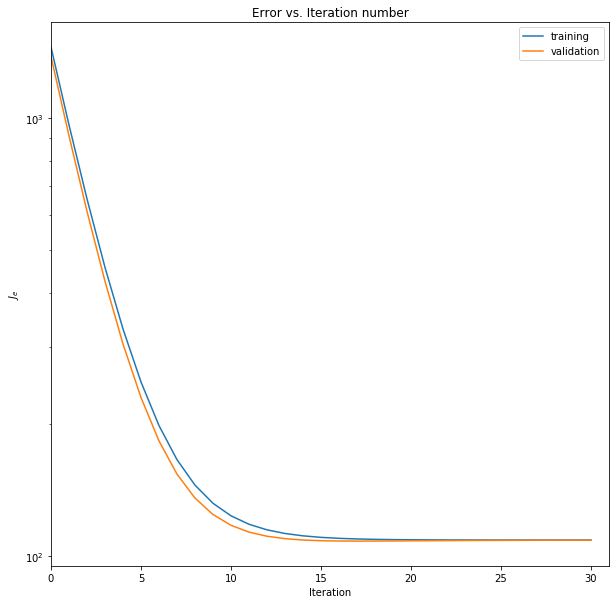

In [42]:
#Plot the number of epochs with scaling adjust.
fig = plt.figure(figsize=(10,10))
plt.plot(np.arange(0, iteration), Jgd_t[0:iteration], label='training')
plt.plot(np.arange(0, iteration), Jgd_v[0:iteration], label='validation')
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.legend()
plt.show()
#plt.savefig("Error_vs_iteration_bgd_Execise_8B.png", dpi=600)

In [43]:
# Print found values with scaling adjust.

# Print found values.
print('a1_opt: ' + str(a_opt[0, 0]))
print('a2_opt: ' + str(a_opt[1, 0]))

print('a1_gd: ' + str(a[0, 0]))
print('a2_gd: ' + str(a[1, 0]))

a1_opt: 0.9730661993772304
a2_opt: 9.91071909562578
a1_gd: 0.9545551546491522
a2_gd: 9.882636732911433
